<font size="6" color ="red" text-align = "center" face="palatino"  font-weight=bold > Diabetes Prediction </font>

The purpose of this project was to predict diabetes using machine learning models. The data set consisted of 768 observations and 9 variables related to diabetes diagnosis. 

The outcome variable was a binary indicator of whether a person had diabetes or not. The predictor variables included demographic and physiological factors such as age, blood glucose level, and insulin level.




Four different models were used to fit the data:
1. linear regression
2. Gaussian naive Bayes
3. Support vector classifier (SVC)
4. Decision tree classifier 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV as grid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
df = pd.read_csv(r'C:\Users\price\Downloads\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Gluscose ,Blood Pressure , Skin Thickness, Insulin and BMI can't be 0.

In [8]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### Dataset is imbalanced

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
smote = SMOTE()

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
X,y = smote.fit_resample(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']],df['Outcome'])

In [15]:
X.shape , y.shape

((1000, 8), (1000,))

In [16]:
df = pd.concat([X,y],axis=1)

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1


In [18]:
df.shape

(1000, 9)

In [19]:
X  = df.drop(["Outcome"],axis = 1)
y = df["Outcome"]

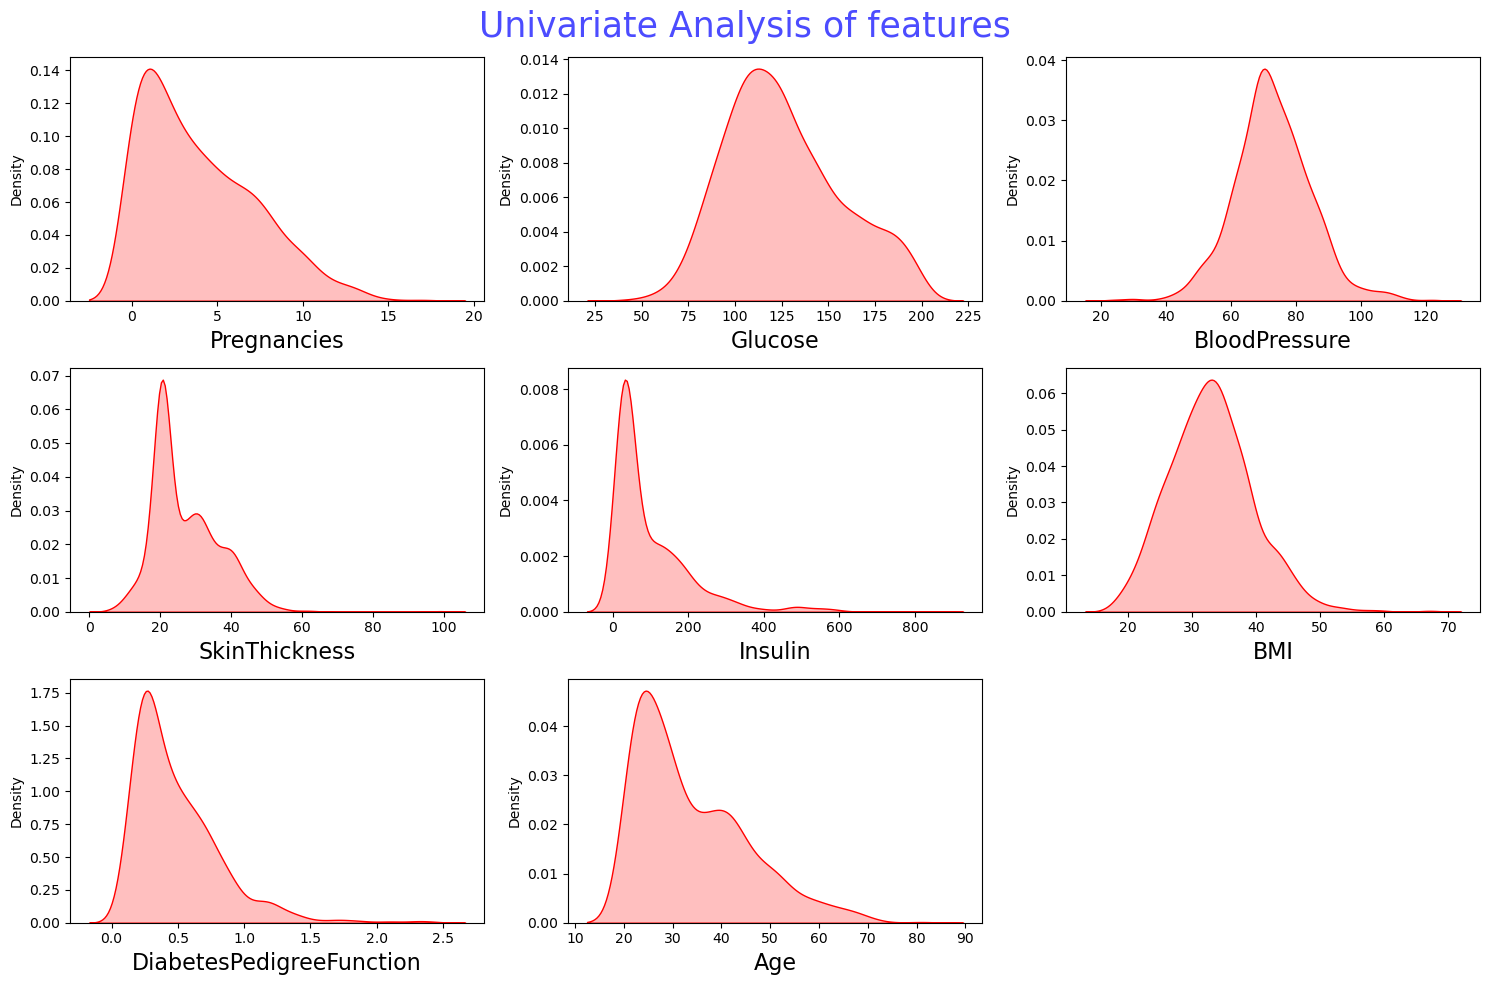

In [20]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of features",fontsize=25, alpha=0.7,c ='blue')
for i, col in enumerate(X.columns):
    fig = plt.subplot(3,3,i+1)
    sns.kdeplot(X[col],fill = True,color ='red')
    plt.xlabel(col,fontsize=16)
    plt.tight_layout()

<Axes: >

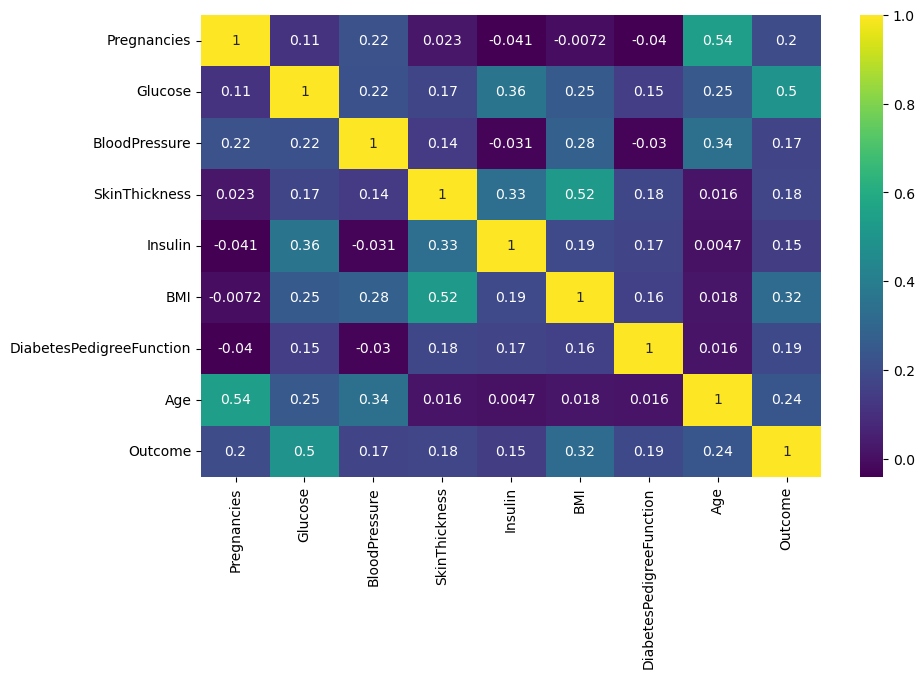

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True , cmap="viridis")

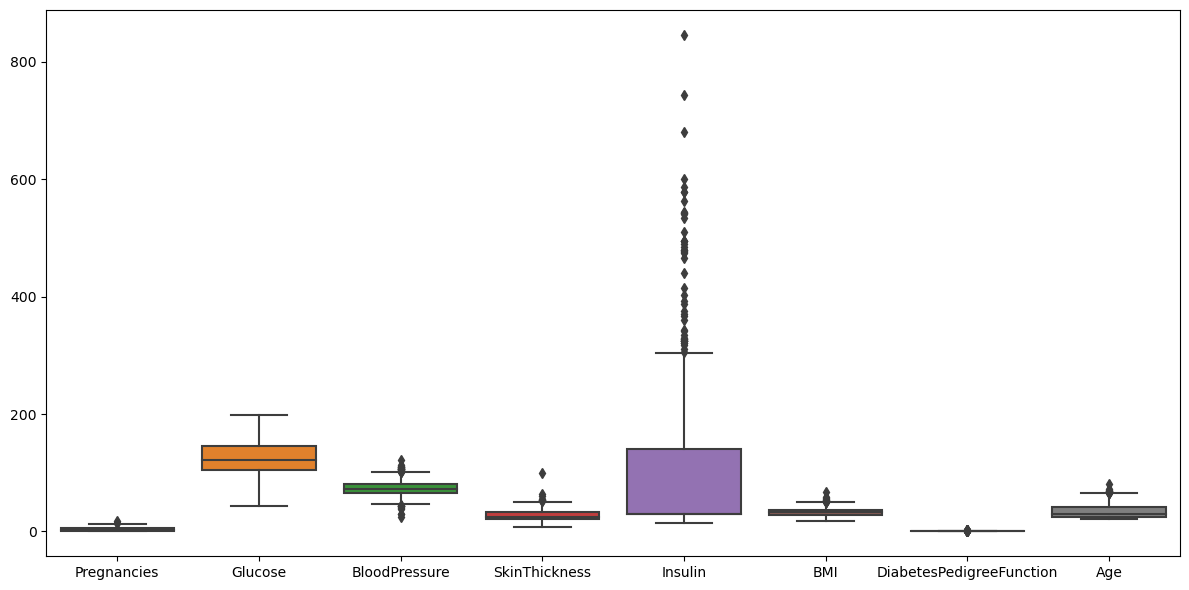

In [22]:
plt.figure(figsize=(12,6))

sns.boxplot(X)
plt.tight_layout()

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [24]:
scaler = StandardScaler()

In [25]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
x_train

array([[ 0.94118589, -1.40265633,  0.41830675, ..., -0.53897591,
         0.86496772,  0.19616778],
       [ 2.16668836,  0.05687454, -0.25218704, ..., -0.05349798,
        -0.94125234,  0.63613739],
       [-0.28431657,  0.14525837,  0.86233147, ...,  0.71154771,
         1.31478102,  0.10817386],
       ...,
       [ 0.94118589,  2.33380378,  0.08597664, ..., -1.06209619,
         2.17029877,  0.46014955],
       [-1.20344342,  0.49878504, -0.32715925, ...,  1.46427286,
        -0.90375581, -0.41978967],
       [-1.20344342, -0.02575051,  1.92691778, ..., -1.57883024,
        -0.7243657 , -1.12374104]])

## Linear Regression

In [27]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_preds = lr.predict(x_test)
score = accuracy_score(y_test,y_preds)
print("Accuracy = ",score)

Accuracy =  0.756


## Hyperparameter tuning 

In [28]:
param_grid = {'penalty':['l1','l2','elasticnet',None],
             'solver':['lbgfs','liblinear','newton-cg','newton-cholesky'],
             'C': np.logspace(-3,3,7)}


In [29]:
grid_lr = grid(lr,param_grid,cv=5,scoring ='accuracy')
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbgfs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']},
             scoring='accuracy')

In [30]:
grid_lr.best_params_

{'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}

In [31]:
lr = LogisticRegression(penalty = 'l2',solver ='liblinear',C=1,random_state=42)
lr.fit(x_train,y_train)
y_preds = lr.predict(x_test)

In [32]:
conf_mat = confusion_matrix(y_test,y_preds)
tp = conf_mat[1][1]
tn = conf_mat[0][0]
fn = conf_mat[1][0]
fp = conf_mat[0][1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Accuracy = ",accuracy_score(y_test,y_preds))
print("Precision = ",precision)
print("Recall = ",recall)

Accuracy =  0.756
Precision =  0.76
Recall =  0.753968253968254


In [33]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       124
           1       0.76      0.75      0.76       126

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



Axes(0.125,0.11;0.62x0.77)


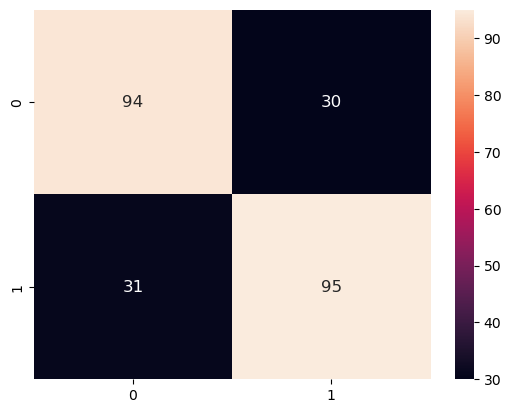

In [34]:
print(sns.heatmap(confusion_matrix(y_test,y_preds),annot = True, annot_kws = {'fontsize':12}))

## Decision Tree Classifier

In [35]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_preds = clf.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_preds))


Accuracy =  0.716


In [36]:
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
             'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':[1,2,3,4,5,6,7],
             'splitter':['best','random']}

In [37]:
grid_clf = grid(clf,param_grid,cv=10,scoring ='accuracy')
grid_clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [38]:
grid_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [39]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=5,max_features ='log2',splitter ='best',random_state=42)
clf.fit(x_train,y_train)
y_preds =clf.predict(x_test)

In [40]:
conf_mat = confusion_matrix(y_test,y_preds)
tp = conf_mat[1][1]
tn = conf_mat[0][0]
fn = conf_mat[1][0]
fp = conf_mat[0][1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Accuracy = ",accuracy_score(y_test,y_preds))
print("Precision = ",precision)
print("Recall = ",recall)

Accuracy =  0.72
Precision =  0.6944444444444444
Recall =  0.7936507936507936


In [41]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       124
           1       0.69      0.79      0.74       126

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



Axes(0.125,0.11;0.62x0.77)


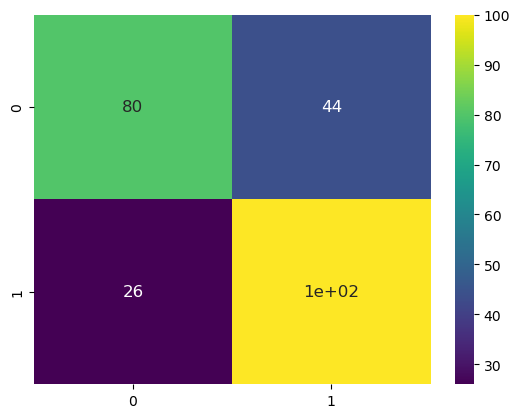

In [42]:
print(sns.heatmap(confusion_matrix(y_test,y_preds),annot = True, annot_kws = {'fontsize':12},cmap="viridis"))

## Support Vector Classifier

In [43]:
svc = SVC(kernel='rbf',probability = True,random_state=42)
svc.fit(x_train,y_train)
y_preds =svc.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_preds))

Accuracy =  0.768


In [44]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }
grid_svc = grid(svc, param_grid, cv=10, scoring='accuracy')
grid_svc.fit(x_train,y_train)
y_preds =grid_svc.predict(x_test)

In [45]:
conf_mat = confusion_matrix(y_test,y_preds)
tp = conf_mat[1][1]
tn = conf_mat[0][0]
fn = conf_mat[1][0]
fp = conf_mat[0][1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Accuracy = ",accuracy_score(y_test,y_preds))
print("Precision = ",precision)
print("Recall = ",recall)

Accuracy =  0.776
Precision =  0.7430555555555556
Recall =  0.8492063492063492


In [46]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       124
           1       0.74      0.85      0.79       126

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.77       250
weighted avg       0.78      0.78      0.77       250



Axes(0.125,0.11;0.62x0.77)


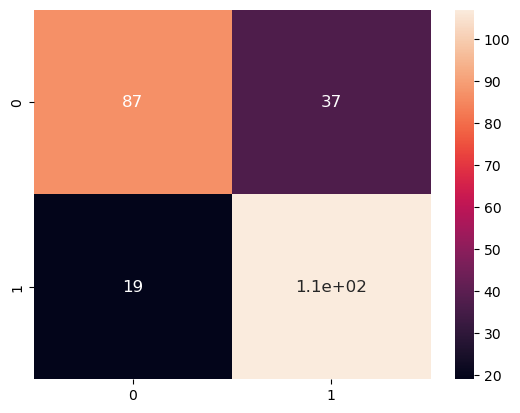

In [47]:
print(sns.heatmap(confusion_matrix(y_test,y_preds),annot = True, annot_kws = {'fontsize':12}))

## Gaussian Naive bayes

In [49]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_preds =gnb.predict(x_test)


In [50]:
conf_mat = confusion_matrix(y_test,y_preds)
tp = conf_mat[1][1]
tn = conf_mat[0][0]
fn = conf_mat[1][0]
fp = conf_mat[0][1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Accuracy = ",accuracy_score(y_test,y_preds))
print("Precision = ",precision)
print("Recall = ",recall)


Accuracy =  0.736
Precision =  0.7830188679245284
Recall =  0.6587301587301587


In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       124
           1       0.78      0.66      0.72       126

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.73       250
weighted avg       0.74      0.74      0.73       250



Axes(0.125,0.11;0.62x0.77)


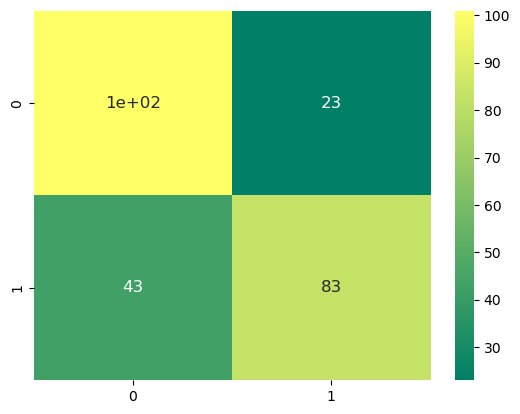

In [52]:
print(sns.heatmap(confusion_matrix(y_test,y_preds),annot = True, annot_kws = {'fontsize':12},cmap="summer"))

In [63]:
report = [[0.76,0.76,0.75],[0.72,0.694,0.79],[0.776,0.743,0.85],[0.736,0.783,0.66]]
model_evaulation = pd.DataFrame(report,columns = ['Accuracy','Precision','Recall'],
                                index = ['Linear Regression','Decision Tree Classifier',
                                         'SVC','Gaussian NB'])

In [64]:
model_evaulation

,Accuracy,Precision,Recall
Linear Regression,0.760,0.760,0.75
Decision Tree Classifier,0.720,0.694,0.79
SVC,0.776,0.743,0.85
Gaussian NB,0.736,0.783,0.66


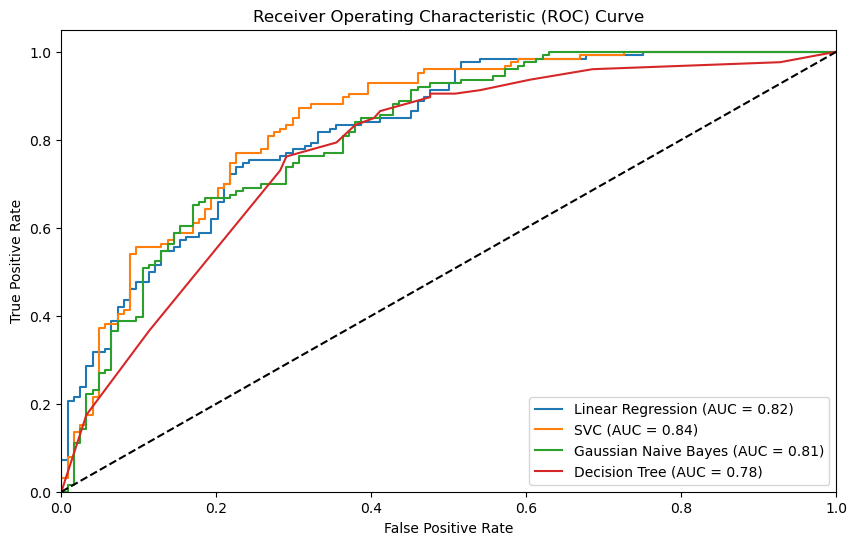

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score , auc

classifiers = {
    "Linear Regression": lr,
    "SVC": grid_svc,
    "Gaussian Naive Bayes":gnb,
    "Decision Tree": clf
}


plt.figure(figsize=(10, 6))

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred_prob = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()







##### I am using pickle to store the SVC model, which has the best performance in terms of accuracy and recall. For diabetes prediction, recall is a crucial metric.

In [55]:
import pickle 
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(grid_svc,open("svc_model.pkl","wb"))

In [56]:
model = pickle.load(open("svc_model.pkl","rb"))

In [57]:
y_preds = model.predict(x_test)
score = accuracy_score(y_test,y_preds)
score

0.776